100%|██████████| 29/29 [07:08<00:00, 14.77s/it]  

t: -8.020560608781873, p: 3.576158011492007e-11


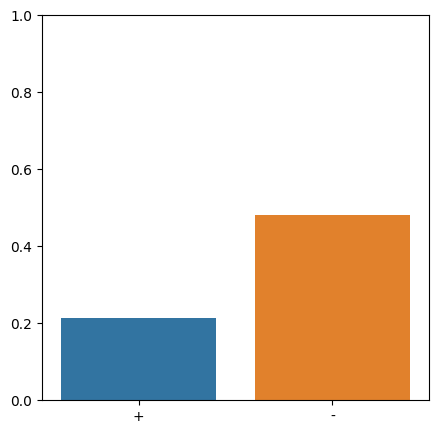

In [1]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=False)

590it [00:06, 88.73it/s] 


t: -3.439937909343383, p: 0.0005646506319530828


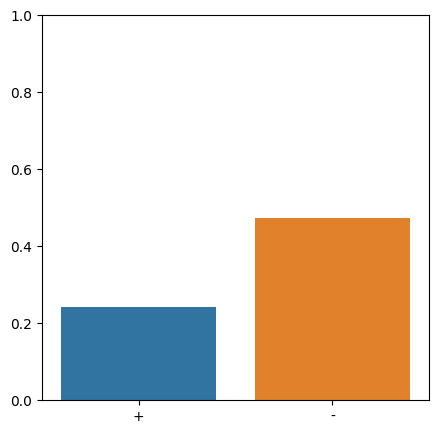

In [1]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=True)

100%|██████████| 29/29 [00:14<00:00,  2.00it/s]


t: -116.29928981054866, p: 0.0


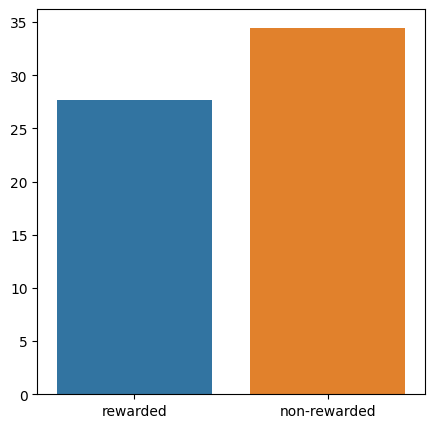

In [2]:
from lib.figure_6 import figure_6_poster_panel_e

figure_6_poster_panel_e(mono=False)

0it [00:00, ?it/s]

590it [00:00, 998.55it/s] 


t: -7.784737816978901, p: 7.019765436743266e-15


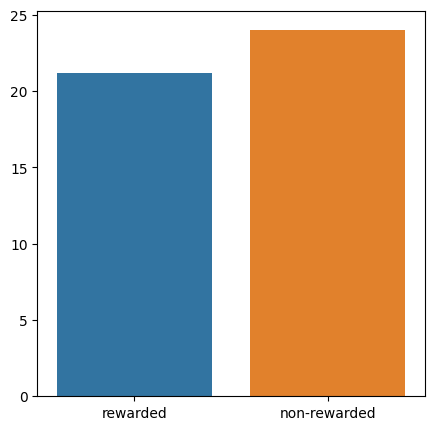

In [3]:
from lib.figure_6 import figure_6_poster_panel_e

figure_6_poster_panel_e(mono=True)

100%|██████████| 29/29 [00:05<00:00,  5.73it/s]


t: -20.212802029318336, p: 7.59799493448309e-91


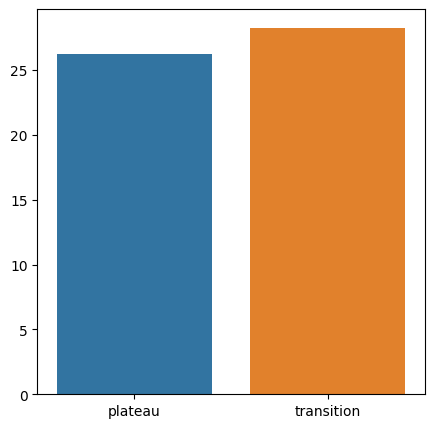

In [1]:
from lib.figure_6 import figure_6_poster_panel_e_plateau_transition

figure_6_poster_panel_e_plateau_transition(mono=False)

100%|██████████| 29/29 [04:46<00:00,  9.89s/it]  


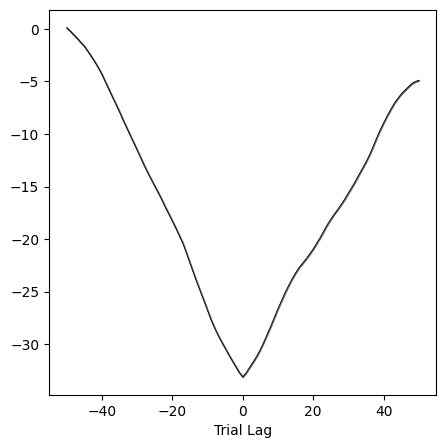

In [7]:
from lib.figure_6 import figure_6_poster_panel_f

figure_6_poster_panel_f(reset=False, mono=False)

590it [00:06, 89.26it/s] 


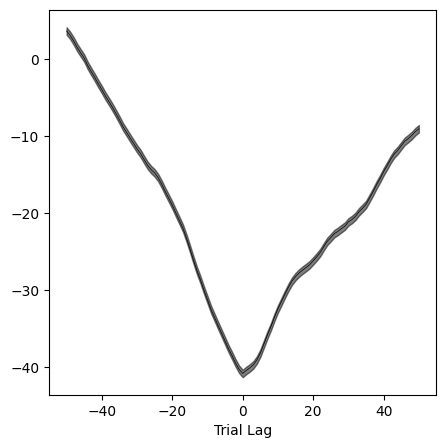

In [8]:
from lib.figure_6 import figure_6_poster_panel_f

figure_6_poster_panel_f(mono=True)